In [22]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import simtk.unit as unit
import seaborn as sns
from scipy import stats

file = open('1_free_particle_300K_5Fric.pkl','rb')

times = pickle.load( file )
positions = pickle.load( file )
velocities = pickle.load( file )

file.close()

In [2]:
times.shape

(500000,)

In [3]:
positions.shape

(500000, 1, 3)

In [4]:
velocities.shape

(500000, 1, 3)

In [5]:
times.unit

Unit({BaseUnit(base_dim=BaseDimension("time"), name="picosecond", symbol="ps"): 1.0})

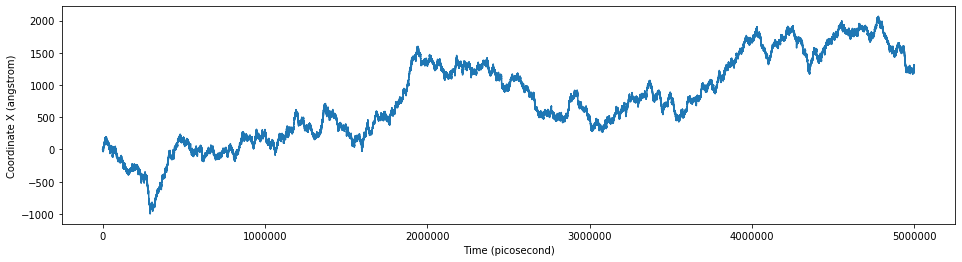

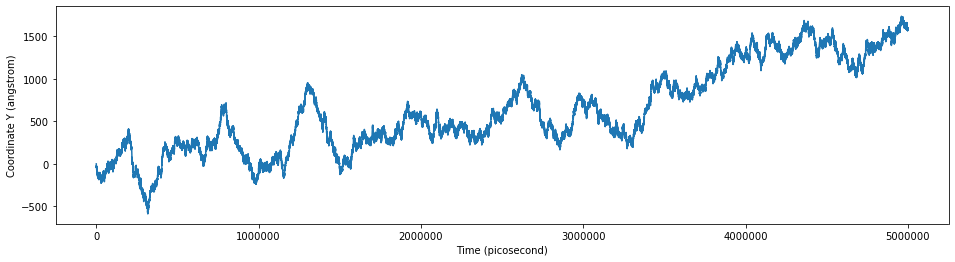

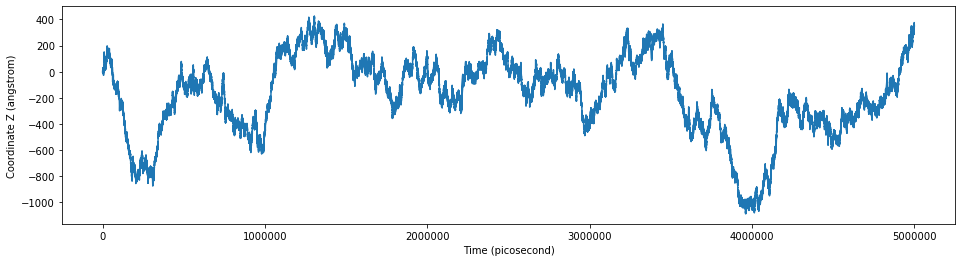

In [6]:
plt.rcParams['figure.figsize'] = [16, 4]

plt.plot(times, positions[:,0,0])
plt.xlabel('Time ({})'.format(times.unit))
plt.ylabel('Coordinate X ({})'.format(positions.unit))
plt.show()

plt.plot(times, positions[:,0,1])
plt.xlabel('Time ({})'.format(times.unit))
plt.ylabel('Coordinate Y ({})'.format(positions.unit))
plt.show()

plt.plot(times, positions[:,0,2])
plt.xlabel('Time ({})'.format(times.unit))
plt.ylabel('Coordinate Z ({})'.format(positions.unit))
plt.show()

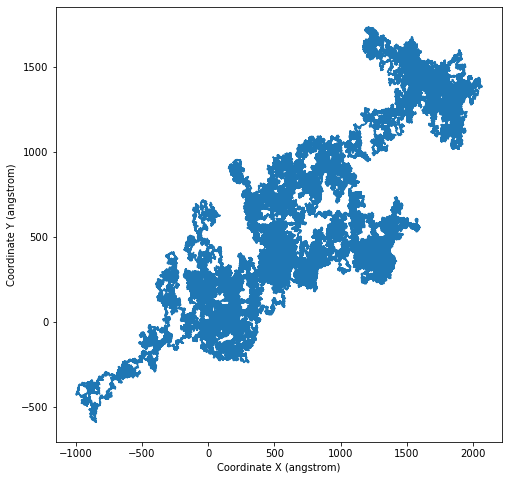

In [7]:
plt.rcParams['figure.figsize'] = [8, 8]

plt.plot(positions[:,0,0], positions[:,0,1])
plt.xlabel('Coordinate X ({})'.format(positions.unit))
plt.ylabel('Coordinate Y ({})'.format(positions.unit))
plt.show()

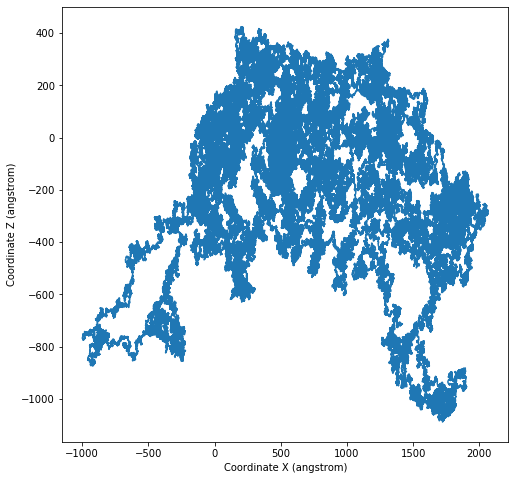

In [8]:
plt.rcParams['figure.figsize'] = [8, 8]

plt.plot(positions[:,0,0], positions[:,0,2])
plt.xlabel('Coordinate X ({})'.format(positions.unit))
plt.ylabel('Coordinate Z ({})'.format(positions.unit))
plt.show()

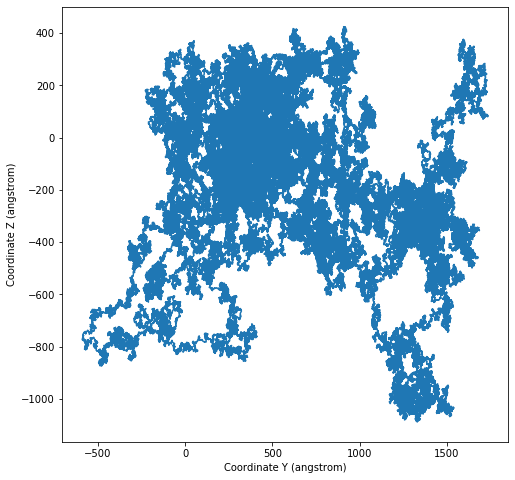

In [9]:
plt.rcParams['figure.figsize'] = [8, 8]

plt.plot(positions[:,0,1], positions[:,0,2])
plt.xlabel('Coordinate Y ({})'.format(positions.unit))
plt.ylabel('Coordinate Z ({})'.format(positions.unit))
plt.show()

In [10]:
cajon = []
for ii in range(0,499999):
    delta = positions[ii+1,0,0] - positions[ii,0,0]
    cajon.append(delta._value)

cajon = cajon*positions.unit

In [11]:
positions.shape


(500000, 1, 3)

In [12]:
def incremento(trayectoria, coordenada, paso):
    
    frames = trayectoria.shape[0]
    cajon = []
    for ii in range(0,frames-paso):
        delta = trayectoria[ii+paso,0,coordenada] - trayectoria[ii,0,coordenada]
        cajon.append(delta._value)

    return np.array(cajon)

In [13]:
incrementos_x_1 = incremento(positions,0,1)
incrementos_x_5 = incremento(positions,0,5)
incrementos_x_10 = incremento(positions,0,10)
incrementos_x_50 = incremento(positions,0,50)
incrementos_x_100 = incremento(positions,0,100)
incrementos_x_500 = incremento(positions,0,500)
incrementos_x_1000 = incremento(positions,0,1000)
incrementos_x_5000 = incremento(positions,0,5000)

#incrementos_y = incremento(positions,1,1)
#incrementos_z = incremento(positions,2,1)

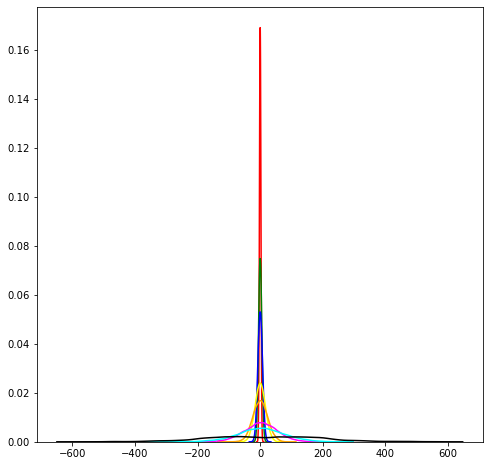

In [14]:
sns.distplot(incrementos_x_1, bins = 100, norm_hist = True, hist =  False, color = 'red')
sns.distplot(incrementos_x_5, bins = 100, norm_hist = True, hist =  False, color = 'green')
sns.distplot(incrementos_x_10, bins = 100, norm_hist = True, hist =  False, color = 'blue')
sns.distplot(incrementos_x_50, bins = 100, norm_hist = True, hist =  False, color = 'yellow')
sns.distplot(incrementos_x_100, bins = 100, norm_hist = True, hist =  False, color = 'orange')
sns.distplot(incrementos_x_500, bins = 100, norm_hist = True, hist =  False, color = 'magenta')
sns.distplot(incrementos_x_1000, bins = 100, norm_hist = True, hist =  False, color = 'cyan')
sns.distplot(incrementos_x_5000, bins = 100, norm_hist = True, hist =  False, color = 'black')

#sns.distplot(incrementos_x, bins = 100, norm_hist = True, hist =  False)
#sns.distplot(incrementos_y, bins = 100, norm_hist = True, hist =  False)
#sns.distplot(incrementos_z, bins = 100, norm_hist = True, hist =  False)

In [15]:
std_x_1 = incrementos_x_1.std()
std_x_5 = incrementos_x_5.std()
std_x_10 = incrementos_x_10.std()
std_x_50 = incrementos_x_50.std()
std_x_100 = incrementos_x_100.std()
std_x_500 = incrementos_x_500.std()
std_x_1000 = incrementos_x_1000.std()
std_x_5000 = incrementos_x_5000.std()

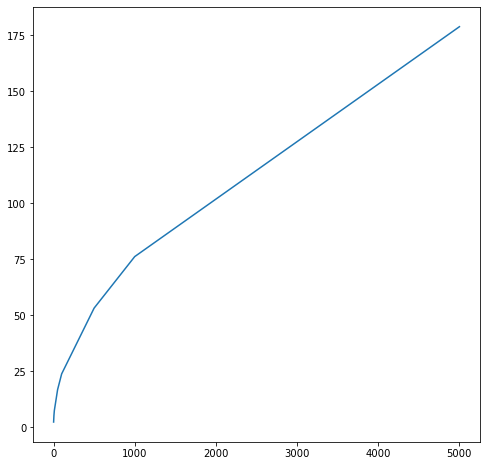

In [18]:
plt.plot([1,5,10,50,100,500,1000,5000],[std_x_1,std_x_5,std_x_10,std_x_50,std_x_100,std_x_500,std_x_1000,std_x_5000])

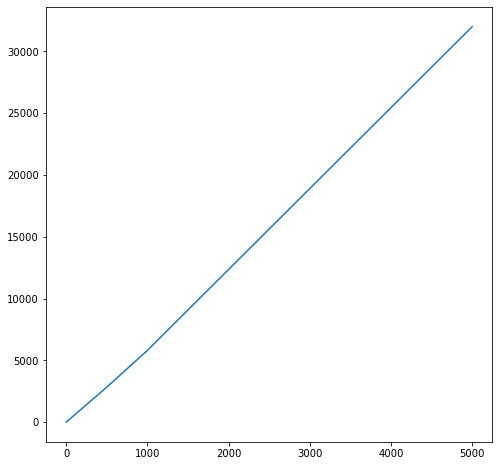

In [21]:
pasos = np.array([1,5,10,50,100,500,1000,5000])
stds = np.array([std_x_1,std_x_5,std_x_10,std_x_50,std_x_100,std_x_500,std_x_1000,std_x_5000])
plt.plot(pasos,stds**2)

#distancia cuadratica promedio para cada tiempo


In [23]:
slope, intercept, r_value, p_value, std_err = stats.linregress(pasos,stds)

In [24]:
slope

0.033662664921519876

In [25]:
intercept

17.462669415081063

In [26]:
r_value

0.9687622811564582

In [27]:
std_err

0.0035179684782240235

In [32]:
def dist_cuad_prom_paso(trayectoria, paso):
    
    frames = trayectoria.shape[0]
    cajon = []
    for ii in range(0,frames-paso):
        deltax = trayectoria[ii+paso,0,0] - trayectoria[ii,0,0]
        deltay = trayectoria[ii+paso,0,1] - trayectoria[ii,0,1]
        deltaz = trayectoria[ii+paso,0,2] - trayectoria[ii,0,2]
        delta_cuad = (deltax**2+deltay**2+deltaz**2)
        cajon.append(delta_cuad._value)

    return np.array(cajon).mean()

def dist_cuad_prom(temperatura, friccion, pasos):
    
    # Cargamos trayectoria
    
    name_file = '1_free_particle_'+str(temperatura)+'K_'+str(friccion)+'Fric.pkl'
    print('Cargando trayectoria: '+name_file)
    file = open(name_file,'rb')
    times = pickle.load( file )
    positions = pickle.load( file )
    velocities = pickle.load( file )
    file.close()
    
    #bucle
    cajon = []
    for paso in pasos:
        print('Calculando distancia cuadratica promedio tras {} pasos'.format(paso))
        d2 = dist_cuad_prom_paso(positions, paso)
        cajon.append(d2)
    
    return np.array(cajon)

In [34]:
d2_T100_F5 = dist_cuad_prom(100, 5, [1,5,10,50,100,500,1000])
d2_T300_F5 = dist_cuad_prom(300, 5, [1,5,10,50,100,500,1000])
d2_T500_F5 = dist_cuad_prom(500, 5, [1,5,10,50,100,500,1000])
d2_T300_F2 = dist_cuad_prom(300, 2, [1,5,10,50,100,500,1000])
d2_T300_F10 = dist_cuad_prom(300,10, [1,5,10,50,100,500,1000])


Cargando trayectoria: 1_free_particle_100K_5Fric.pkl
Calculando distancia cuadratica promedio tras 1 pasos
Calculando distancia cuadratica promedio tras 5 pasos
Calculando distancia cuadratica promedio tras 10 pasos
Calculando distancia cuadratica promedio tras 50 pasos
Calculando distancia cuadratica promedio tras 100 pasos
Calculando distancia cuadratica promedio tras 500 pasos
Calculando distancia cuadratica promedio tras 1000 pasos
Cargando trayectoria: 1_free_particle_300K_5Fric.pkl
Calculando distancia cuadratica promedio tras 1 pasos
Calculando distancia cuadratica promedio tras 5 pasos
Calculando distancia cuadratica promedio tras 10 pasos
Calculando distancia cuadratica promedio tras 50 pasos
Calculando distancia cuadratica promedio tras 100 pasos
Calculando distancia cuadratica promedio tras 500 pasos
Calculando distancia cuadratica promedio tras 1000 pasos
Cargando trayectoria: 1_free_particle_500K_5Fric.pkl
Calculando distancia cuadratica promedio tras 1 pasos
Calculando di

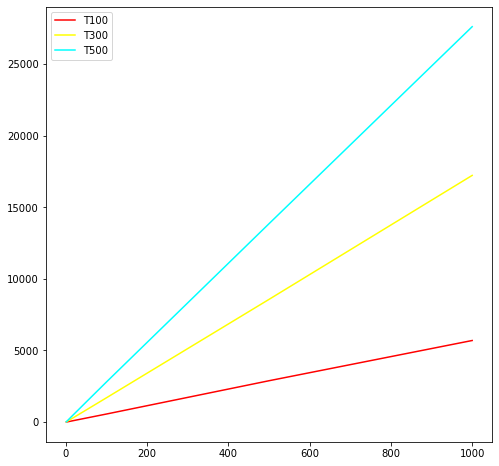

In [36]:
plt.plot([1,5,10,50,100,500,1000],d2_T100_F5,color = 'red', label = 'T100')
plt.plot([1,5,10,50,100,500,1000],d2_T300_F5,color = 'yellow', label = 'T300')
plt.plot([1,5,10,50,100,500,1000],d2_T500_F5,color = 'cyan', label = 'T500')
plt.legend(loc='upper left')

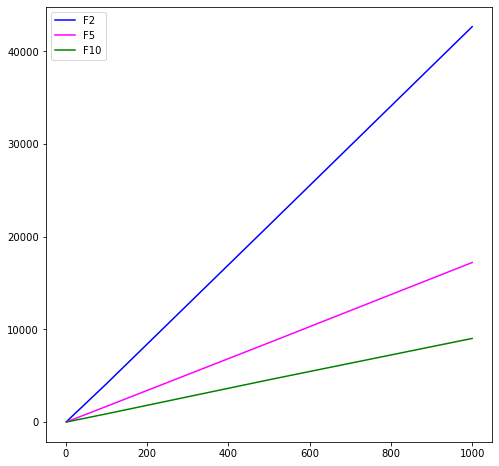

In [38]:
plt.plot([1,5,10,50,100,500,1000],d2_T300_F2,color = 'blue', label = 'F2')
plt.plot([1,5,10,50,100,500,1000],d2_T300_F5,color = 'magenta', label = 'F5')
plt.plot([1,5,10,50,100,500,1000],d2_T300_F10,color = 'green', label = 'F10')
plt.legend(loc='upper left')

In [81]:
#Energía cinética

def EnCin(temperatura,friccion):
    
    # Cargamos trayectoria
    
    name_file = '1_free_particle_'+str(temperatura)+'K_'+str(friccion)+'Fric.pkl'
    print('Cargando trayectoria: '+name_file)
    file = open(name_file,'rb')
    times = pickle.load( file )
    positions = pickle.load( file )
    velocities = pickle.load( file )
    file.close()
    
    v2 = velocities[:,0,0]**2 + velocities[:,0,1]**2 + velocities[:,0,2]**2
    
    EC = 0.5*180.15*unit.amu*v2.mean()
    return EC.in_units_of(unit.kilojoule_per_mole)

In [82]:
EnCin_T100_F5 = EnCin(100,5)
EnCin_T300_F5 = EnCin(300,5)
EnCin_T500_F5 = EnCin(500,5)
EnCin_T300_F2 = EnCin(300,2)
EnCin_T300_F10 = EnCin(300,10)

Cargando trayectoria: 1_free_particle_100K_5Fric.pkl
Cargando trayectoria: 1_free_particle_300K_5Fric.pkl
Cargando trayectoria: 1_free_particle_500K_5Fric.pkl
Cargando trayectoria: 1_free_particle_300K_2Fric.pkl
Cargando trayectoria: 1_free_particle_300K_10Fric.pkl


In [83]:
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA

In [84]:
EnCinTeo = 3/2 *kB*np.array([100,300,500])*unit.kelvin
EnCinTeo = EnCinTeo.in_units_of(unit.kilojoule_per_mole)

In [85]:
EnCinTeo

Quantity(value=array([1.24717087, 3.74151261, 6.23585435]), unit=kilojoule/mole)

In [86]:
EnCin_T100_F5

Quantity(value=1.2487875448465346, unit=kilojoule/mole)

In [87]:
EnCin_T300_F5

Quantity(value=3.742290869593621, unit=kilojoule/mole)

In [88]:
EnCin_T500_F5

Quantity(value=6.238401326537132, unit=kilojoule/mole)

In [89]:
EnCin_T300_F2

Quantity(value=3.744904444456101, unit=kilojoule/mole)

In [90]:
EnCin_T300_F10

Quantity(value=3.7387160489559177, unit=kilojoule/mole)